# __Pharma Exploratory Plots__

__Questions to answer:__
* What is the correlation among variables (particularly drug prices and patent application/expiration dates)?
* What is the average patent term?
* What does the patent application date distribution look like?
* Generic vs. Brand drug prices
* Price by active ingredient (correlation & sorting)
* Drug price over time
* What is the average value of a patent?
* What is the average value of exclusivity?


__Conclusions:__
*  

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
# Read in our data
df = pd.read_csv('merged_all.csv', engine = 'python')
df.describe(include = 'all')

,Unnamed: 0,ndc_description,cost_per_unit_usd,effective_date,pricing_unit,over_the_counter,classification_for_rate_setting,as_of_date,ndc_description_agg,score,...,appl_type_y,patent_no,patent_expire_date_text,drug_product_flag,patent_use_code,delist_flag,submission_date,appl_type,exclusivity_code,exclusivity_date
count,10037225,9978725,9.978725e+06,9978725,9978725,9978725,9978725,9978725,9978725,9.978725e+06,...,23361,23361,23361,11250,13382,86,16648,16206,16206,16206
unique,9993213,733,NaN,416,3,2,3,296,618,NaN,...,1,4743,2143,1,1637,1,1407,2,403,593
top,IMBRUVICA 140MG ORAL,LOSARTAN POTASSIUM 50MG TABLET,NaN,2018-10-17,EA,N,G,2018-08-29,AMLODIPINE BESYLATE AND BENAZEPRIL HYDROCHLORI...,NaN,...,N,8835443,"Dec 28, 2026",Y,U-493,Y,"Sep 15, 2017",N,NCE,"Jul 27, 2020"
freq,822,211094,NaN,195113,9601448,9659263,9943969,38637,454314,NaN,...,23361,208,633,11250,214,86,338,16167,2341,418
mean,NaN,NaN,8.529105e-01,NaN,NaN,NaN,NaN,NaN,NaN,8.763332e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.521254e+01,NaN,NaN,NaN,NaN,NaN,NaN,2.293836e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,8.120000e-03,NaN,NaN,NaN,NaN,NaN,NaN,8.600000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.261000e-02,NaN,NaN,NaN,NaN,NaN,NaN,8.600000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.084000e-01,NaN,NaN,NaN,NaN,NaN,NaN,8.700000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.861700e-01,NaN,NaN,NaN,NaN,NaN,NaN,8.800000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Interesting insights from the numbers above:__
* The average cost per unit is $0.85.  Units are most often 'each', and refer to tablets.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037292 entries, 0 to 10037291
Data columns (total 33 columns):
Unnamed: 0                         object
ndc_description                    object
cost_per_unit_usd                  float64
effective_date                     object
pricing_unit                       object
over_the_counter                   object
classification_for_rate_setting    object
as_of_date                         object
ndc_description_agg                object
score                              float64
ingredient                         object
dosage_form                        object
route                              object
trade_name                         object
strength                           object
appl_type_x                        object
product_no                         float64
te_code                            object
approval_date                      object
rld                                object
rs                                 object


In [4]:
df.head(5)

,Unnamed: 0,ndc_description,cost_per_unit_usd,effective_date,pricing_unit,over_the_counter,classification_for_rate_setting,as_of_date,ndc_description_agg,score,...,appl_type_y,patent_no,patent_expire_date_text,drug_product_flag,patent_use_code,delist_flag,submission_date,appl_type,exclusivity_code,exclusivity_date
0,0,IBUPROFEN 200MG TABLET,0.02991,2018-11-21,EA,Y,G,2018-12-12,IBUPROFEN 200MG ORAL,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,IBUPROFEN 200MG TABLET,0.02991,2018-11-21,EA,Y,G,2018-12-12,IBUPROFEN 200MG ORAL,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,IBUPROFEN 200MG TABLET,0.02991,2018-11-21,EA,Y,G,2018-12-12,IBUPROFEN 200MG ORAL,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,IBUPROFEN 200MG TABLET,0.02991,2018-11-21,EA,Y,G,2018-12-12,IBUPROFEN 200MG ORAL,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,IBUPROFEN 200MG TABLET,0.02991,2018-11-21,EA,Y,G,2018-12-12,IBUPROFEN 200MG ORAL,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# df.drop(['Unnamed: 0', 'drug_product_flag','delist_flag','patent_use_code'], axis = 1, inplace = True)
# Create a subset of the 10 most interesting columns
df_sub = df[['ndc_description', 
             'cost_per_unit_usd', 
             'effective_date', 
             'over_the_counter', 
             'classification_for_rate_setting',
             'submission_date',
             'patent_expire_date_text',
             'applicant_full_name',
             'approval_date',
             'exclusivity_date']]

In [6]:
# del df_sub
# del df
# import gc
# gc.collect()

In [ ]:
# Not working (yet)
# df_sub['submission_date'] = pd.to_datetime(df_sub.loc[df_sub['submission_date']], format = '%b %d, %Y')
# df_sub['exclusivity_date'] = pd.to_datetime(df_sub.loc[df_sub['exclusivity_date']],format = '%b %d, %Y')
# df_sub['patent_expire_date_text'] = pd.to_datetime(df_sub.loc[df_sub['patent_expire_date_text']],format = '%b %d, %Y')

In [35]:
df_sub_patents = df[df['cost_per_unit_usd'].notnull()][:10000]
df_sub_patents.describe(include = 'all')

,Unnamed: 0,ndc_description,cost_per_unit_usd,effective_date,pricing_unit,over_the_counter,classification_for_rate_setting,as_of_date,ndc_description_agg,score,...,appl_type_y,patent_no,patent_expire_date_text,drug_product_flag,patent_use_code,delist_flag,submission_date,appl_type,exclusivity_code,exclusivity_date
count,10000,10000,10000.000000,10000,10000,10000,10000,10000,10000,10000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,10000,1,NaN,8,1,1,1,25,1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
top,6029,IBUPROFEN 200MG TABLET,NaN,2019-04-17,EA,Y,G,2019-05-22,IBUPROFEN 200MG ORAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,10000,NaN,2160,10000,10000,10000,450,10000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.029798,NaN,NaN,NaN,NaN,NaN,NaN,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.001143,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.028430,NaN,NaN,NaN,NaN,NaN,NaN,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.028700,NaN,NaN,NaN,NaN,NaN,NaN,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.029340,NaN,NaN,NaN,NaN,NaN,NaN,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.030830,NaN,NaN,NaN,NaN,NaN,NaN,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_sub_patents['patent_no'].value_counts(dropna = False)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

ValueError: zero-size array to reduction operation minimum which has no identity

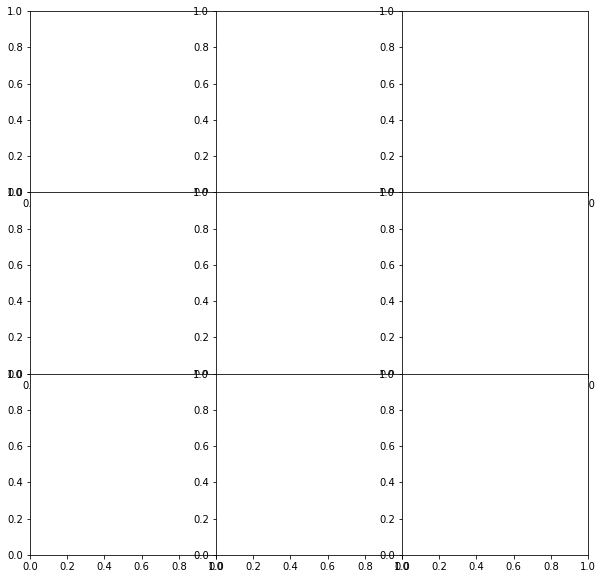

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_sub_patents, alpha = 0.2, figsize = (10,10), diagonal = 'kde')

In [ ]:
import seaborn as sns
sns.set(style = 'ticks')

sns.pairplot(df_sub_patents)

In [ ]:
from scipy.stats import chisquare
chisquare(df)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr = df_sub.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})